# Mass-Spring-Damper System: Generating Training and Test Data

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')



### Importing External Libraries

import numpy                             as np
import pandas                            as pd


### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


from scipy.integrate import solve_ivp
import pyDOE
# from PCAfold         import PCA          as PCAA

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


## Defining Input Variables

In [2]:
OutputDir          = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/MSD_100Cases_UncertainParams/')
FigDir             = os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_TEMP/')

n_training_params  = 100
n_test_params      = 5  

n_training_y0      = 100
n_test_y0          = 5  

Nt                 = 100
tout               = np.linspace(0.,15.,Nt)
SOLVER             = 'Radau'

ParamsMinVals      = np.array([3.0, 3.0, 3.0], dtype=np.float64)
ParamsMaxVals      = np.array([0.5, 0.5, 0.5], dtype=np.float64)

y0MinVals          = [-4., -4.]
y0MaxVals          = [4., 4.]

ColorVec           = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

try:
    os.makedirs(OutputDir)
except OSError as e:
    pass

OutputDir += '/Orig/'
try:
    os.makedirs(OutputDir)
except OSError as e:
    pass

TempDir = OutputDir+'/train/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = TempDir+'/ext/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = OutputDir+'/test/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = TempDir+'/ext/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

## ODE

In [3]:
def fOrig(t, y, m, c, k):
    return [y[1], -k/m*y[0]-c/m*y[1]]

def fOrig_Source(t, y):
    return [y[1], -Params[2]/Params[0]*y[0]-Params[1]/Params[0]*y[1]]

def fOrig_Jacobian(t, y):

    Eps = 1e-6
    J   = np.zeros([len(y), len(y)], dtype = np.float)

    for i in range(len(y)):
        y1 = y.copy()
        y2 = y.copy()

        y1[i] += Eps
        y2[i] -= Eps

        f1 = np.array(fOrig(t, y1))
        f2 = np.array(fOrig(t, y2))

        J[ : , i] = (f1 - f2) / (2. * Eps)

    return J

## Sampling and Plotting Initial Conditions

In [4]:
# m, c, k

ParamsMat     = pyDOE.lhs(3, samples=n_training_params, criterion='center')
for i in range(3):
    ParamsMat[:,i] = ParamsMat[:,i] * (ParamsMaxVals[i] - ParamsMinVals[i]) + ParamsMinVals[i]

ParamsTest     = pyDOE.lhs(3, samples=n_test_params, criterion='center')
for i in range(3):
    ParamsTest[:,i] = ParamsTest[:,i] * (ParamsMaxVals[i] - ParamsMinVals[i]) + ParamsMinVals[i]

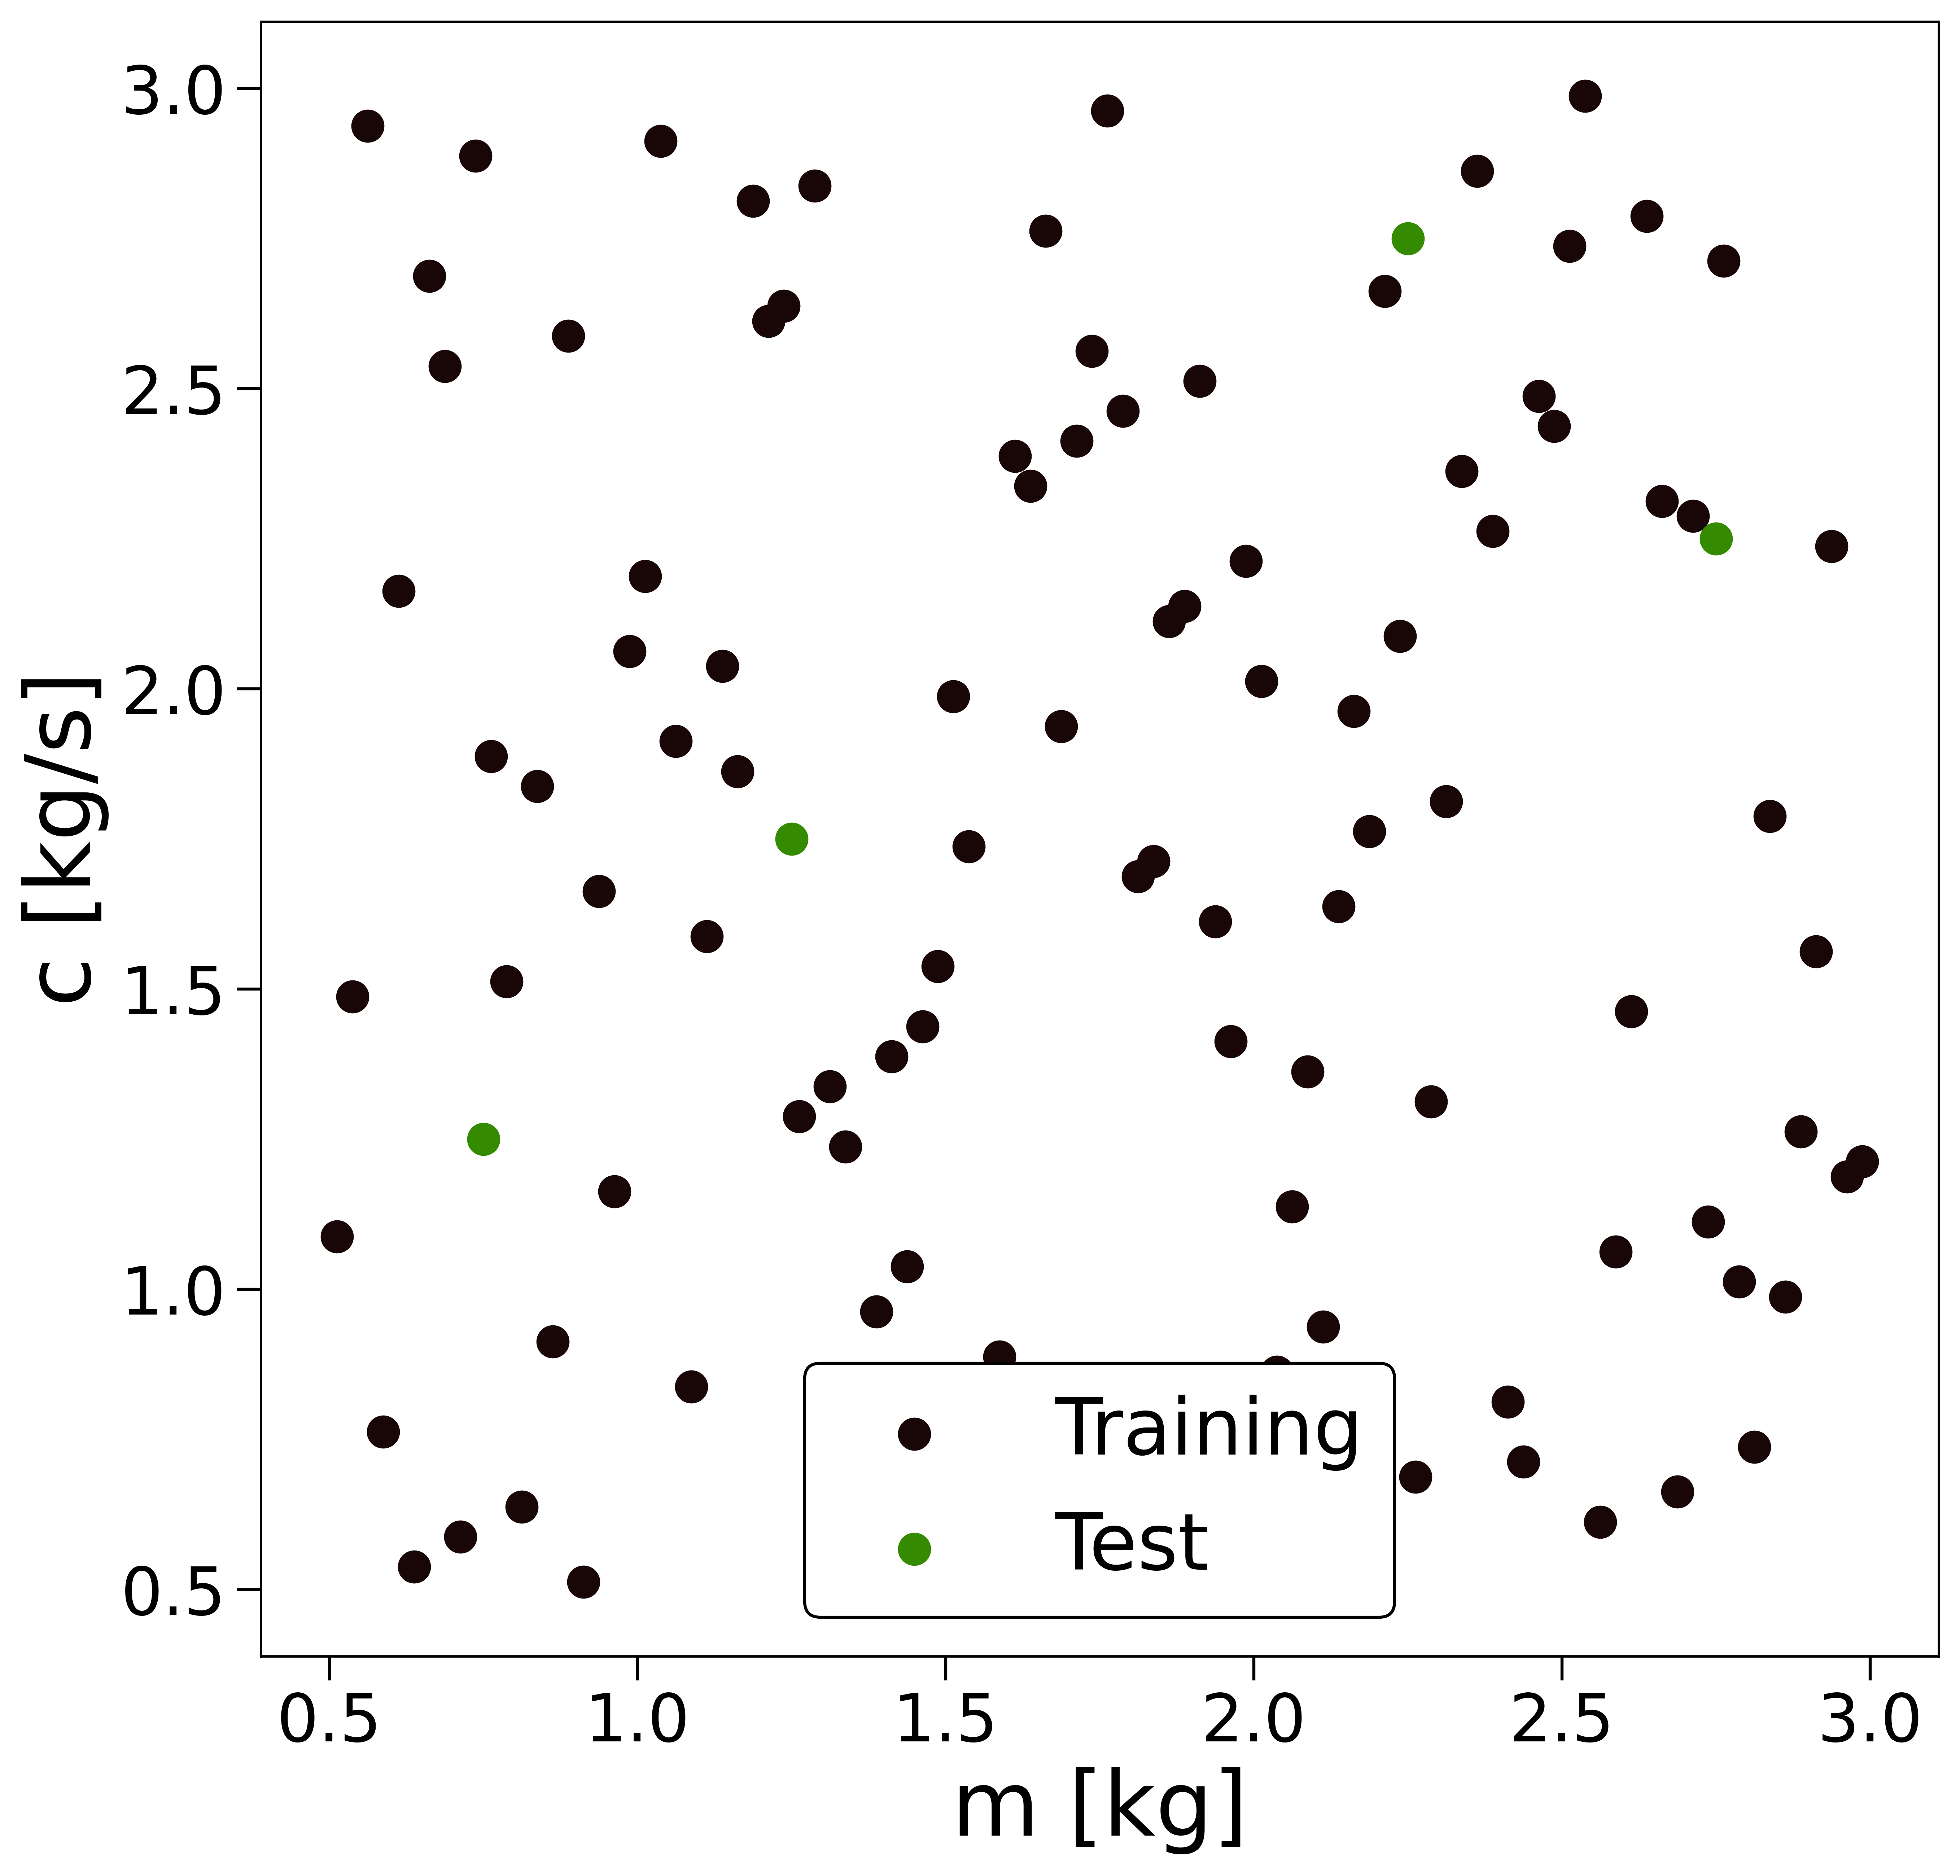

In [5]:
plt.figure()
plt.scatter(ParamsMat[:,0],   ParamsMat[:,1],                label='Training')
plt.scatter(ParamsTest[:,0], ParamsTest[:,1], c=ColorVec[3], label='Test')
plt.xlabel('m [kg]')
plt.ylabel('c [kg/s]')
plt.legend()

if (FigDir):
    plt.savefig(FigDir+'/MSD_ICs.eps', format='eps', bbox_inches='tight')

In [6]:
### From Uniform Distibutions

# y0Mat      = np.zeros((n_training,2))
# y0Mat[:,0] = np.random.rand(n_training)*4. - 2.0
# y0Mat[:,1] = np.random.rand(n_training)*4. - 2.0

# y0MatTest      = np.zeros((n_test,2))
# y0MatTest[:,0] = np.random.rand(n_test)*4. - 2.0
# y0MatTest[:,1] = np.random.rand(n_test)*2. - 1.0


### From Latin Hypercube 

y0Mat     = pyDOE.lhs(2, samples=n_training_y0, criterion='center')
for i in range(2):
    y0Mat[:,i] = y0Mat[:,i] * (y0MaxVals[i] - y0MinVals[i]) + y0MinVals[i]

y0MatTest     = pyDOE.lhs(2, samples=n_test_y0, criterion='center')
for i in range(2):
    y0MatTest[:,i] = y0MatTest[:,i] * (y0MaxVals[i] - y0MinVals[i]) + y0MinVals[i]

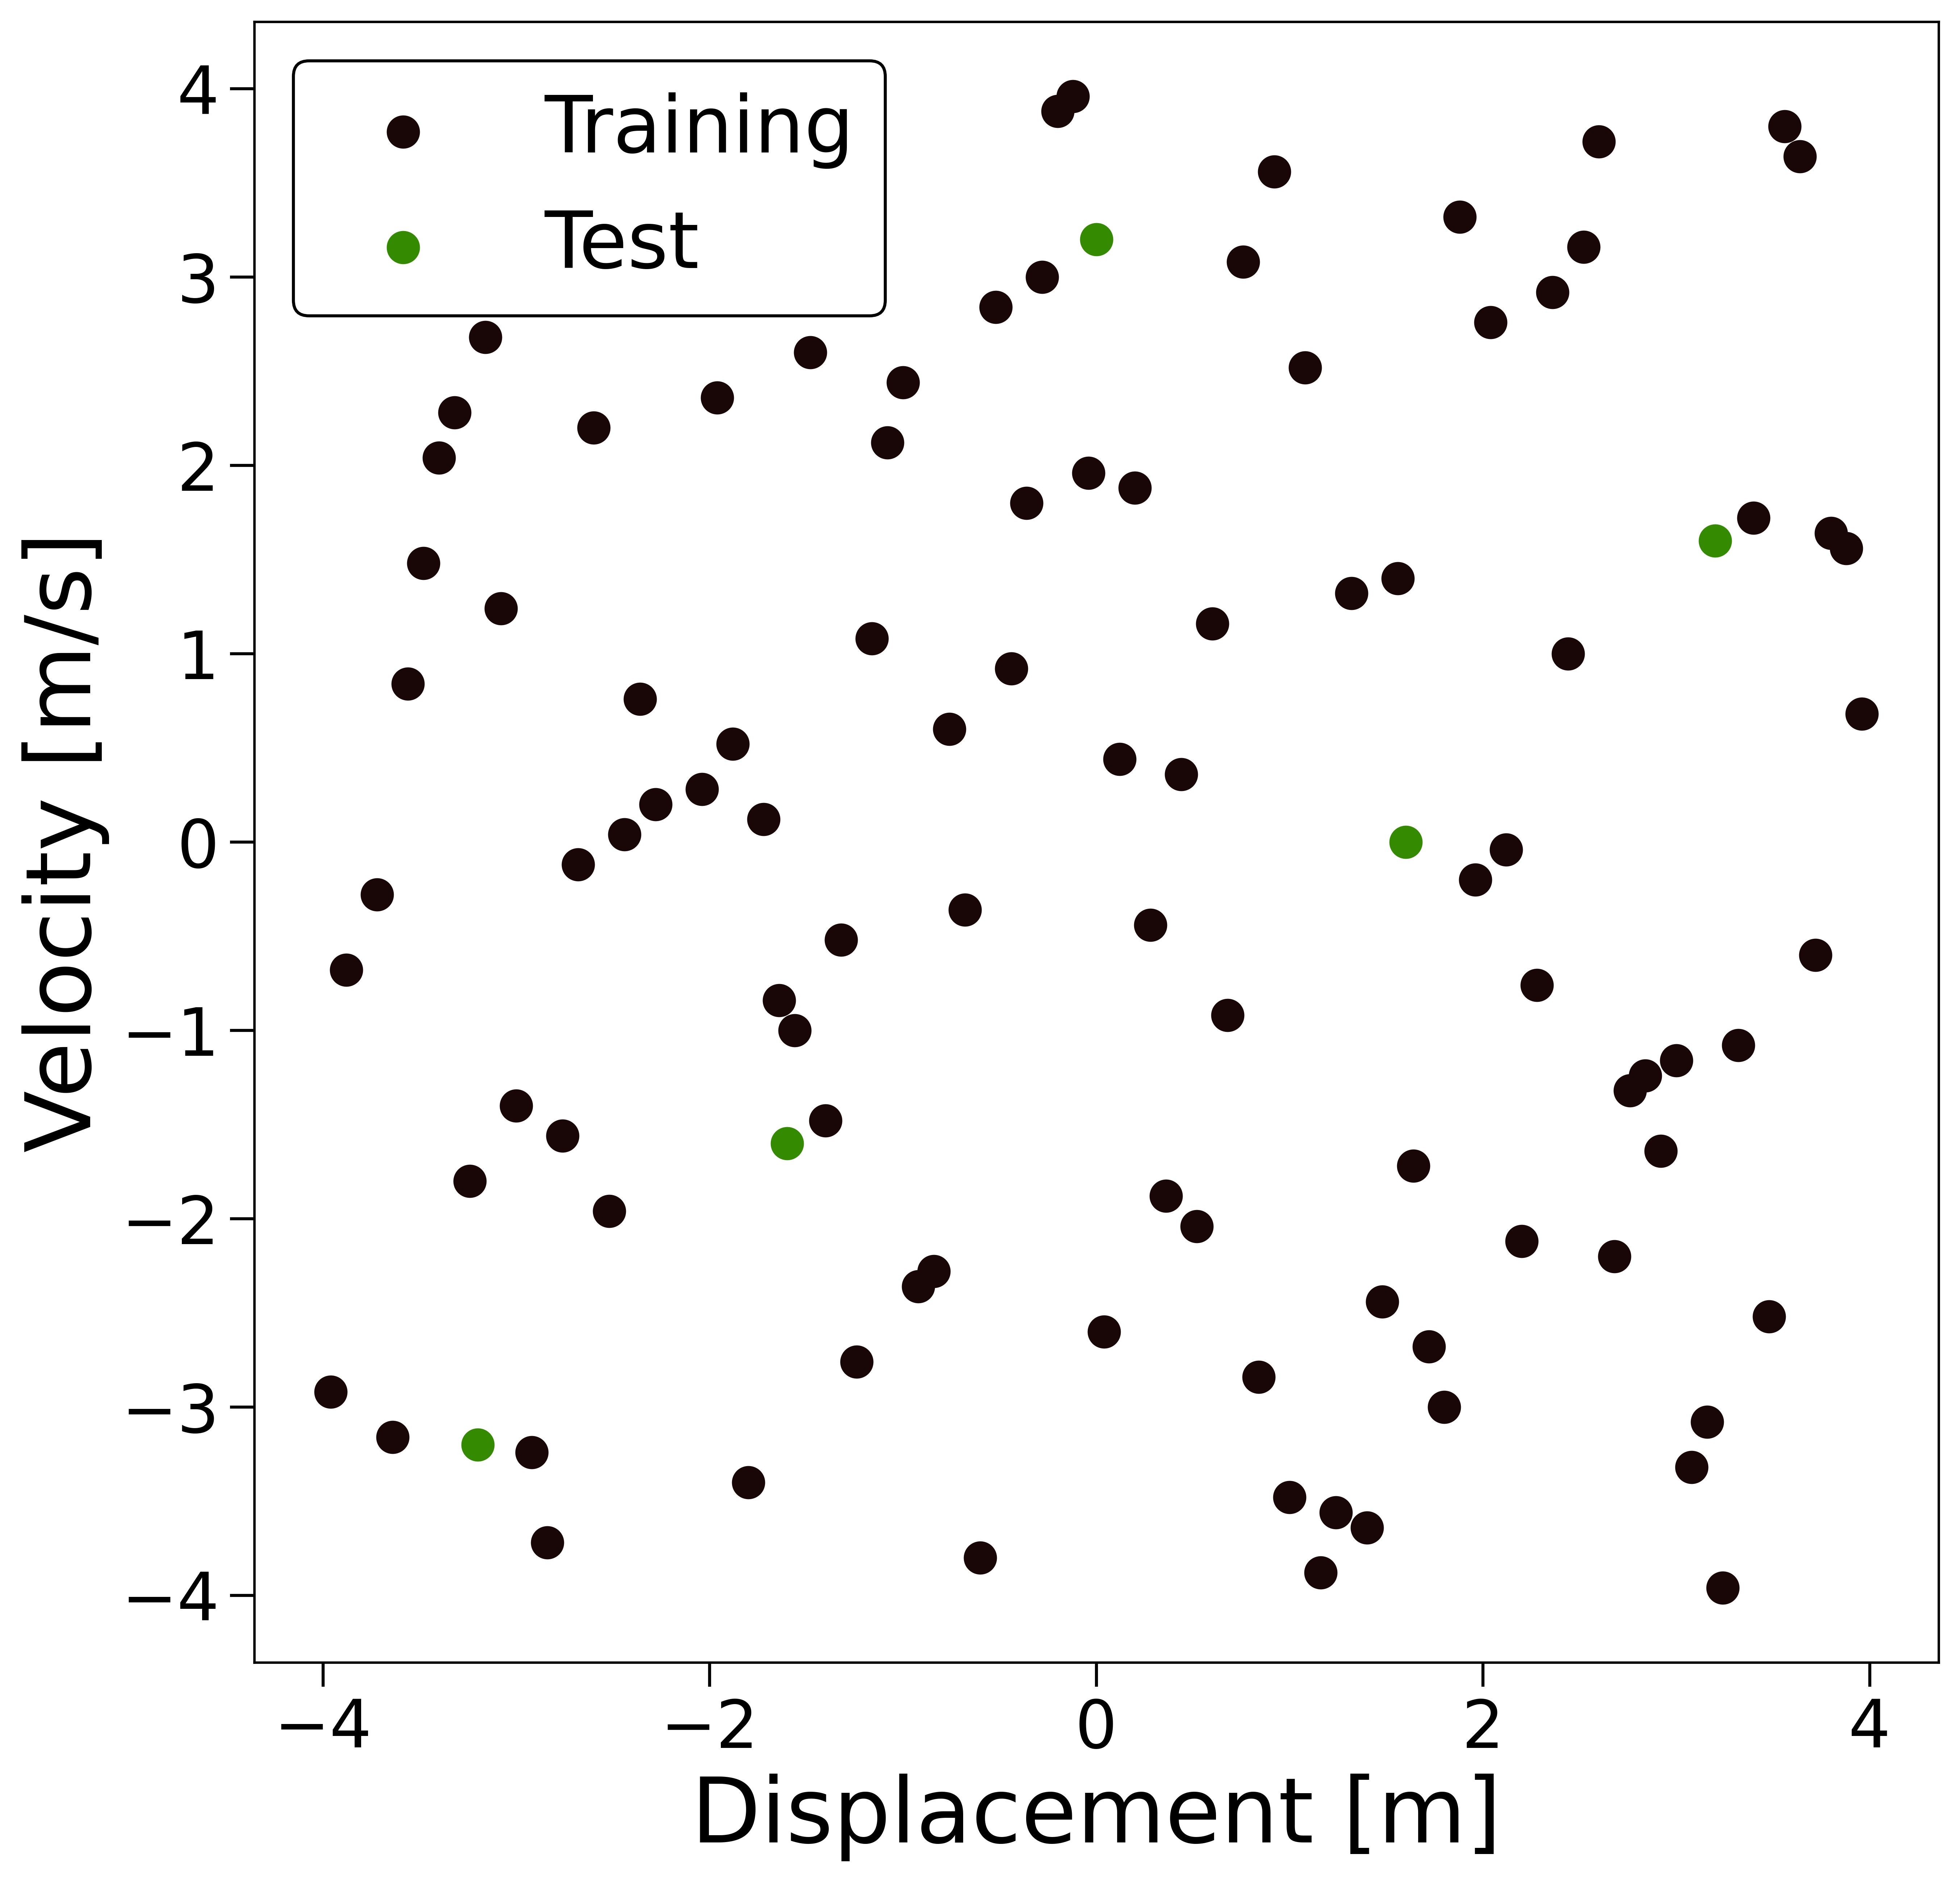

In [7]:
plt.figure()
plt.scatter(y0Mat[:,0],     y0Mat[:,1],                    label='Training')
plt.scatter(y0MatTest[:,0], y0MatTest[:,1], c=ColorVec[3], label='Test')
plt.xlabel('Displacement [m]')
plt.ylabel('Velocity [m/s]')
plt.legend()

if (FigDir):
    plt.savefig(FigDir+'/MSD_ICs.eps', format='eps', bbox_inches='tight')

## Generating Training Data

y0 =  [0.44 0.36]
y0 =  [-0.28  3.  ]
y0 =  [ 0.36 -1.88]
y0 =  [ 0.84 -2.84]
y0 =  [ 1.4  -3.64]
y0 =  [-3.  -1.4]
y0 =  [-3.4   2.04]
y0 =  [-0.04  1.96]
y0 =  [ 3.   -1.16]
y0 =  [-1.56 -1.  ]
y0 =  [-2.76 -1.56]
y0 =  [-3.88 -0.68]
y0 =  [-1.8 -3.4]
y0 =  [-0.84 -2.28]
y0 =  [ 3.16 -3.08]
y0 =  [-0.92 -2.36]
y0 =  [-3.32  2.28]
y0 =  [ 0.68 -0.92]
y0 =  [-0.44  0.92]
y0 =  [ 0.52 -2.04]
y0 =  [3.56 3.8 ]
y0 =  [-0.2   3.88]
y0 =  [-2.2   3.48]
y0 =  [3.88 1.56]
y0 =  [2.04 2.76]
y0 =  [2.6  3.72]
y0 =  [-2.6  2.2]
y0 =  [1.08 2.52]
y0 =  [-2.28  0.2 ]
y0 =  [ 2.12 -0.04]
y0 =  [ 1.   -3.48]
y0 =  [-1.48  2.6 ]
y0 =  [-1.4  -1.48]
y0 =  [ 3.08 -3.32]
y0 =  [3.96 0.68]
y0 =  [ 1.64 -1.72]
y0 =  [1.56 1.4 ]
y0 =  [-1.64 -0.84]
y0 =  [-1.96  2.36]
y0 =  [-3.72 -0.28]
y0 =  [ 3.32 -1.08]
y0 =  [2.52 3.16]
y0 =  [-3.8   3.24]
y0 =  [-2.36  0.76]
y0 =  [-2.44  0.04]
y0 =  [-3.16  2.68]
y0 =  [-1.08  2.12]
y0 =  [-1.88  0.52]
y0 =  [ 3.72 -0.6 ]
y0 =  [-3.56  0.84]
y0 =  [-2.92 -3.24]
y0 =

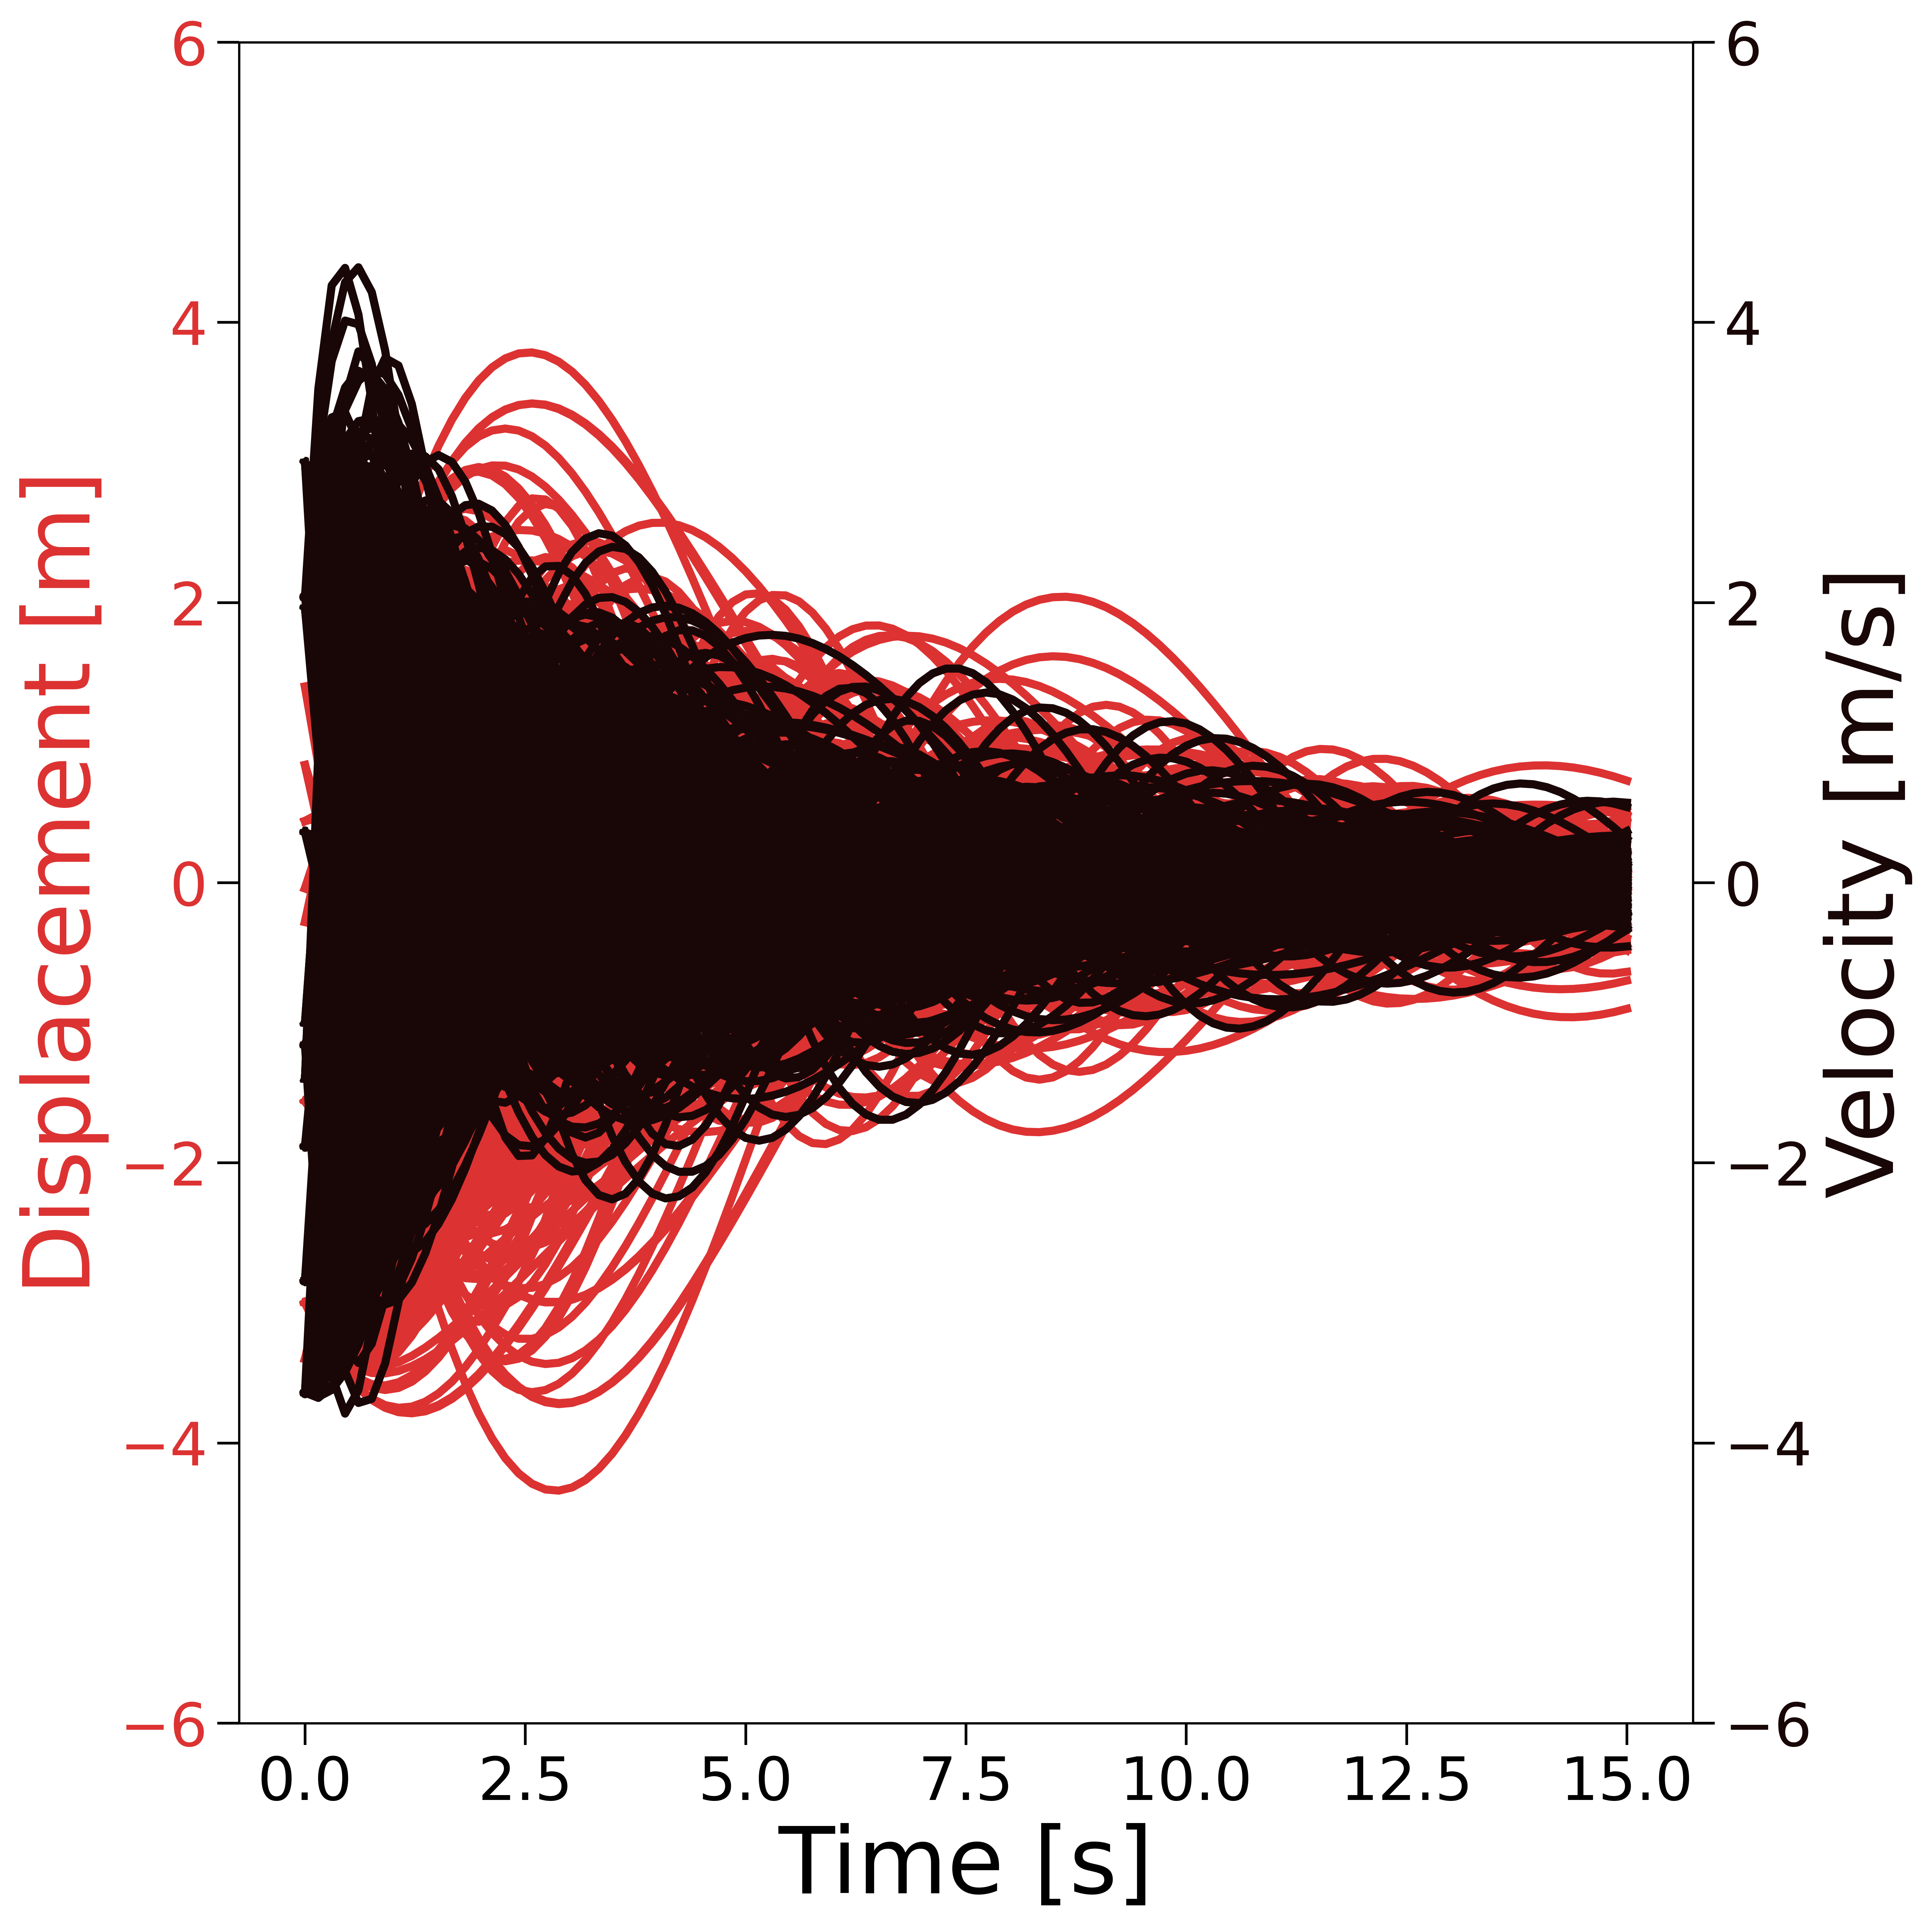

In [9]:
n_training = n_training_params * n_training_y0

fig, ax1 = plt.subplots()
ax2      = ax1.twinx()  # instantiate a second axes that shares the same x-axis
iSample  = 0
for iSample_params in range(n_training_params):
    Params         = ParamsMat[iSample_params,:]
    ThetaMatTemp   = np.tile(Params, (Nt, 1))
    
    for iSample_y0 in range(n_training_y0):
        y0         = y0Mat[iSample_y0,:]
        print('y0 = ', y0)

        output     = solve_ivp( fOrig, tout[[0,-1]], y0, method=SOLVER, t_eval=tout, rtol=1.e-12, atol=1.e-10, args=Params )

        tMatTemp   = tout[...,np.newaxis]
        uMatTemp   = np.tile(y0, (Nt, 1))

        if (iSample_y0//10 == 0):
            color = ColorVec[1]
            ax1.plot(output.t, output.y[0,:], color=color)

            color = ColorVec[0]
            ax2.plot(output.t, output.y[1,:], color=color)


        # ySourceTemp = np.zeros_like(output.y)
        # JJTauMat    = np.zeros((output.y.shape[1], output.y.shape[0]*2))
        # for it in range(Nt):
        #     ySourceTemp[:,it] = fOrig_Source(output.t, output.y[:,it])
        #     JJ                = fOrig_Jacobian(it, output.y[:,it])        
        #     JJEig, JJVec      = np.linalg.eig(JJ)
        #     JJTauMat[it,0:2]  = 1./JJEig.real
        #     JJTauMat[it,2:4]  = 1./JJEig.imag

        if (iSample == 0):
            tMat    = tMatTemp
            uMat    = uMatTemp
            pMat    = ThetaMatTemp
            yMat    = output.y.T 
            #ySource = ySourceTemp.T
        else:
            tMat    = np.concatenate((tMat,    tMatTemp), axis=0)
            uMat    = np.concatenate((uMat,    uMatTemp), axis=0)
            pMat    = np.concatenate((pMat,    ThetaMatTemp), axis=0)
            yMat    = np.concatenate((yMat,    output.y.T), axis=0)
            #ySource = np.concatenate((ySource, ySourceTemp.T), axis=0)

        Header   = 't,m,c,k,x,v'
        FileName = OutputDir+'/train/ext/y.csv.'+str(iSample+1)
        np.savetxt(FileName, np.concatenate((tMatTemp, ThetaMatTemp, output.y.T), axis=1), delimiter=',', header=Header, comments='')
    
        iSample += 1
#ax1.set_xlim([0.,15.])
        
color = ColorVec[1]
ax1.set_xlabel('Time [s]', size=34)
ax1.set_ylabel('Displacement [m]', color=color, size=34)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-6.,6.])

color = ColorVec[0]
ax2.set_ylabel('Velocity [m/s]', color=color, size=34)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-6.,6.])

fig.tight_layout()  # otherwise the right y-label is slightly clipped


if (FigDir):
    plt.savefig(FigDir+'/MSD_TrainDynamics.eps', format='eps', bbox_inches='tight')

## Splitting and Writing Training Data

In [10]:
from sklearn.model_selection import train_test_split

try:
    os.makedirs(OutputDir+'/valid/')
except:
    pass

In [11]:
data_id    = 'pts'

DataInput  = pd.DataFrame(np.concatenate((tMat,pMat,uMat), axis=1), columns=['t','m','c','k','x','v'])
DataOutput = pd.DataFrame(np.concatenate((tMat,yMat), axis=1), columns=['t','x','v'])
                          
n_points   = len(DataInput)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/valid/'+data_id+'/')
except:
    pass

DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

In [12]:
data_id    = 'ics'

t0Mat      = np.zeros((n_training,1))
p0Mat      = np.zeros((n_training,3))
u0Mat      = np.zeros((n_training,2))
i_training = 0
for i_training_params in range(n_training_params):
    for i_training_y0 in range(n_training_y0):        
        p0Mat[i_training,:] = ParamsMat[i_training_params,:]
        u0Mat[i_training,:] = y0Mat[i_training_y0,:]
        i_training += 1

DataInput  = pd.DataFrame(np.concatenate((t0Mat,p0Mat,u0Mat), axis=1), columns=['t','m','c','k','x','v'])
DataOutput = pd.DataFrame(np.concatenate((t0Mat,u0Mat), axis=1), columns=['t','x','v'])
                          
n_points   = len(DataInput)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/valid/'+data_id+'/')
except:
    pass

DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

In [13]:
data_id    = 'res'

DataInput  = pd.DataFrame(np.concatenate((tMat,pMat,uMat), axis=1), columns=['t','m','c','k','x','v'])
DataOutput = pd.DataFrame(np.concatenate((tMat,yMat*0.), axis=1), columns=['t','x','v'])
                          
n_points   = len(DataInput)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/valid/'+data_id+'/')
except:
    pass

DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

## Generating Test Data

y0 =  [-3.2 -3.2]
y0 =  [0.  3.2]
y0 =  [3.2 1.6]
y0 =  [1.6 0. ]
y0 =  [-1.6 -1.6]
y0 =  [-3.2 -3.2]
y0 =  [0.  3.2]
y0 =  [3.2 1.6]
y0 =  [1.6 0. ]
y0 =  [-1.6 -1.6]
y0 =  [-3.2 -3.2]
y0 =  [0.  3.2]
y0 =  [3.2 1.6]
y0 =  [1.6 0. ]
y0 =  [-1.6 -1.6]
y0 =  [-3.2 -3.2]
y0 =  [0.  3.2]
y0 =  [3.2 1.6]
y0 =  [1.6 0. ]
y0 =  [-1.6 -1.6]
y0 =  [-3.2 -3.2]
y0 =  [0.  3.2]
y0 =  [3.2 1.6]
y0 =  [1.6 0. ]
y0 =  [-1.6 -1.6]


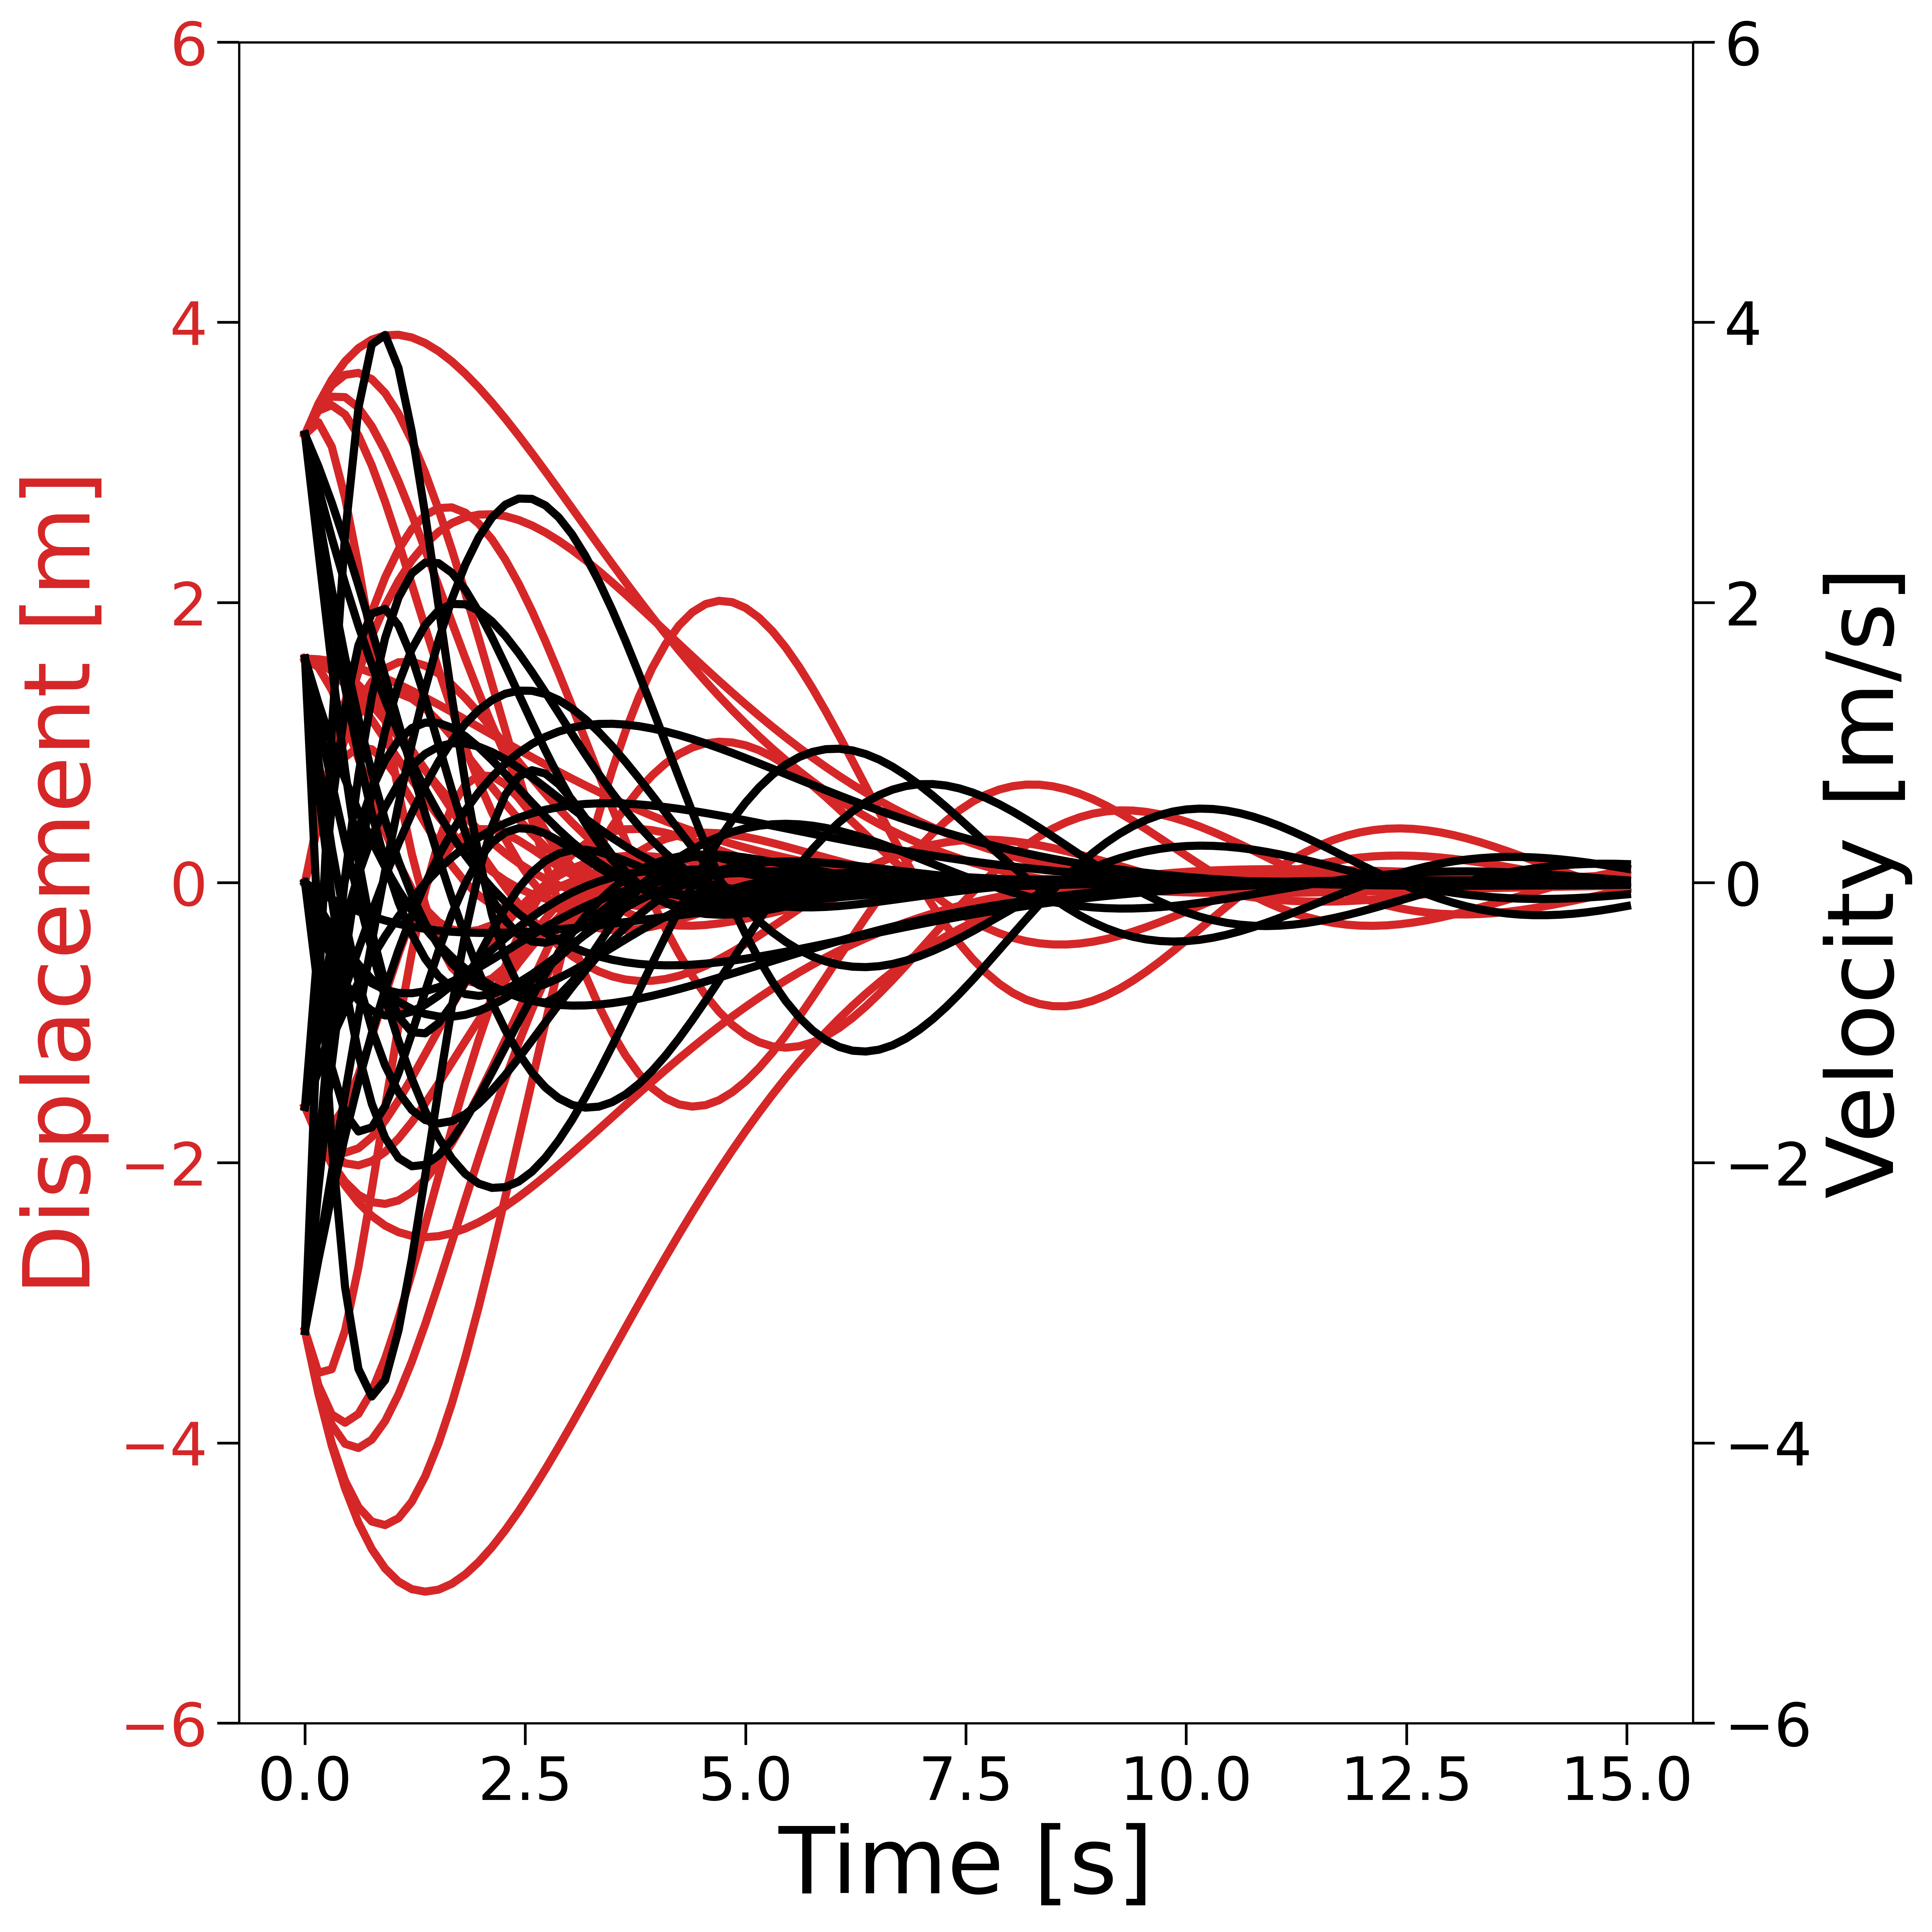

In [17]:
fig, ax1 = plt.subplots()
ax2      = ax1.twinx()  # instantiate a second axes that shares the same x-axis
iSample  = 0
for iSample_params in range(n_test_params):
    Params     = ParamsTest[iSample_params,:]
    pMatTemp   = np.tile(Params, (Nt, 1))

    for iSample_y0 in range(n_test_y0):
        y0         = y0MatTest[iSample_y0,:]
        print('y0 = ', y0)

        output     = solve_ivp( fOrig, tout[[0,-1]], y0, method=SOLVER, t_eval=tout, rtol=1.e-12, atol=1.e-10, args=Params )

        tMatTemp   = tout[...,np.newaxis]
        uMatTemp   = np.tile(y0, (Nt, 1))

        color = 'tab:red'
        ax1.plot(output.t, output.y[0,:], color=color)

        color = 'k'
        ax2.plot(output.t, output.y[1,:], color=color)

        ySourceTemp = np.zeros_like(output.y)
        for it in range(Nt):
            ySourceTemp[:,it] = fOrig_Source(output.t, output.y[:,it])

        if (iSample == 0):
            tMatTest    = tMatTemp
            pMatTest    = pMatTemp
            uMatTest    = uMatTemp
            yMatTest    = output.y.T 
            ySourceTest = ySourceTemp.T
        else:
            tMatTest    = np.concatenate((tMatTest,    tMatTemp), axis=0)
            pMatTest    = np.concatenate((pMatTest,    pMatTemp), axis=0)
            uMatTest    = np.concatenate((uMatTest,    uMatTemp), axis=0)
            yMatTest    = np.concatenate((yMatTest,    output.y.T), axis=0)
            ySourceTest = np.concatenate((ySourceTest, ySourceTemp.T), axis=0)

        Header   = 't,m,c,k,x,v'
        FileName = OutputDir+'/test/ext/y.csv.'+str(iSample+1)
        np.savetxt(FileName, np.concatenate((tMatTemp,pMatTemp,output.y.T), axis=1), delimiter=',', header=Header, comments='')

        iSample += 1
        
        
color = 'tab:red'
ax1.set_xlabel('Time [s]', size=34)
ax1.set_ylabel('Displacement [m]', color=color, size=34)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-6.,6.])

color = 'k'
ax2.set_ylabel('Velocity [m/s]', color=color, size=34)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-6.,6.])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

if (FigDir):
    plt.savefig(FigDir+'/MSD_TestDynamics.eps', format='eps', bbox_inches='tight')

## Writing Test Data

In [18]:
TestDir  = OutputDir+'/test/ext/'

Header   = 't,m,c,k,x,v'
FileName = TestDir+'/Input.csv'
np.savetxt(FileName, np.concatenate((tMatTest,pMatTest,uMatTest), axis=1), delimiter=',', header=Header, comments='')
        
Header   = 't,x,v'
FileName = TestDir+'/Output.csv'
np.savetxt(FileName, np.concatenate((tMatTest,yMatTest), axis=1), delimiter=',', header=Header, comments='')

Header   = 't,dx,dv'
FileName = TestDir+'/dOutput.csv'
np.savetxt(FileName, np.concatenate((tMatTest,ySourceTest), axis=1), delimiter=',', header=Header, comments='')